# **Dash: Crafting Dynamic Web Apps**
Dash to create powerful interactive web applications using the Python programming language, interactive dashboards where users can customize filters, perform additional analysis and view live data visualizations that can provide solutions with fast-paced.

Enabling better interaction between teams and departments by using Dash to create engaging and informative interactive web applications.

Author by: `'N Khadijah NST'`

Data Analytics | Business Intelligence

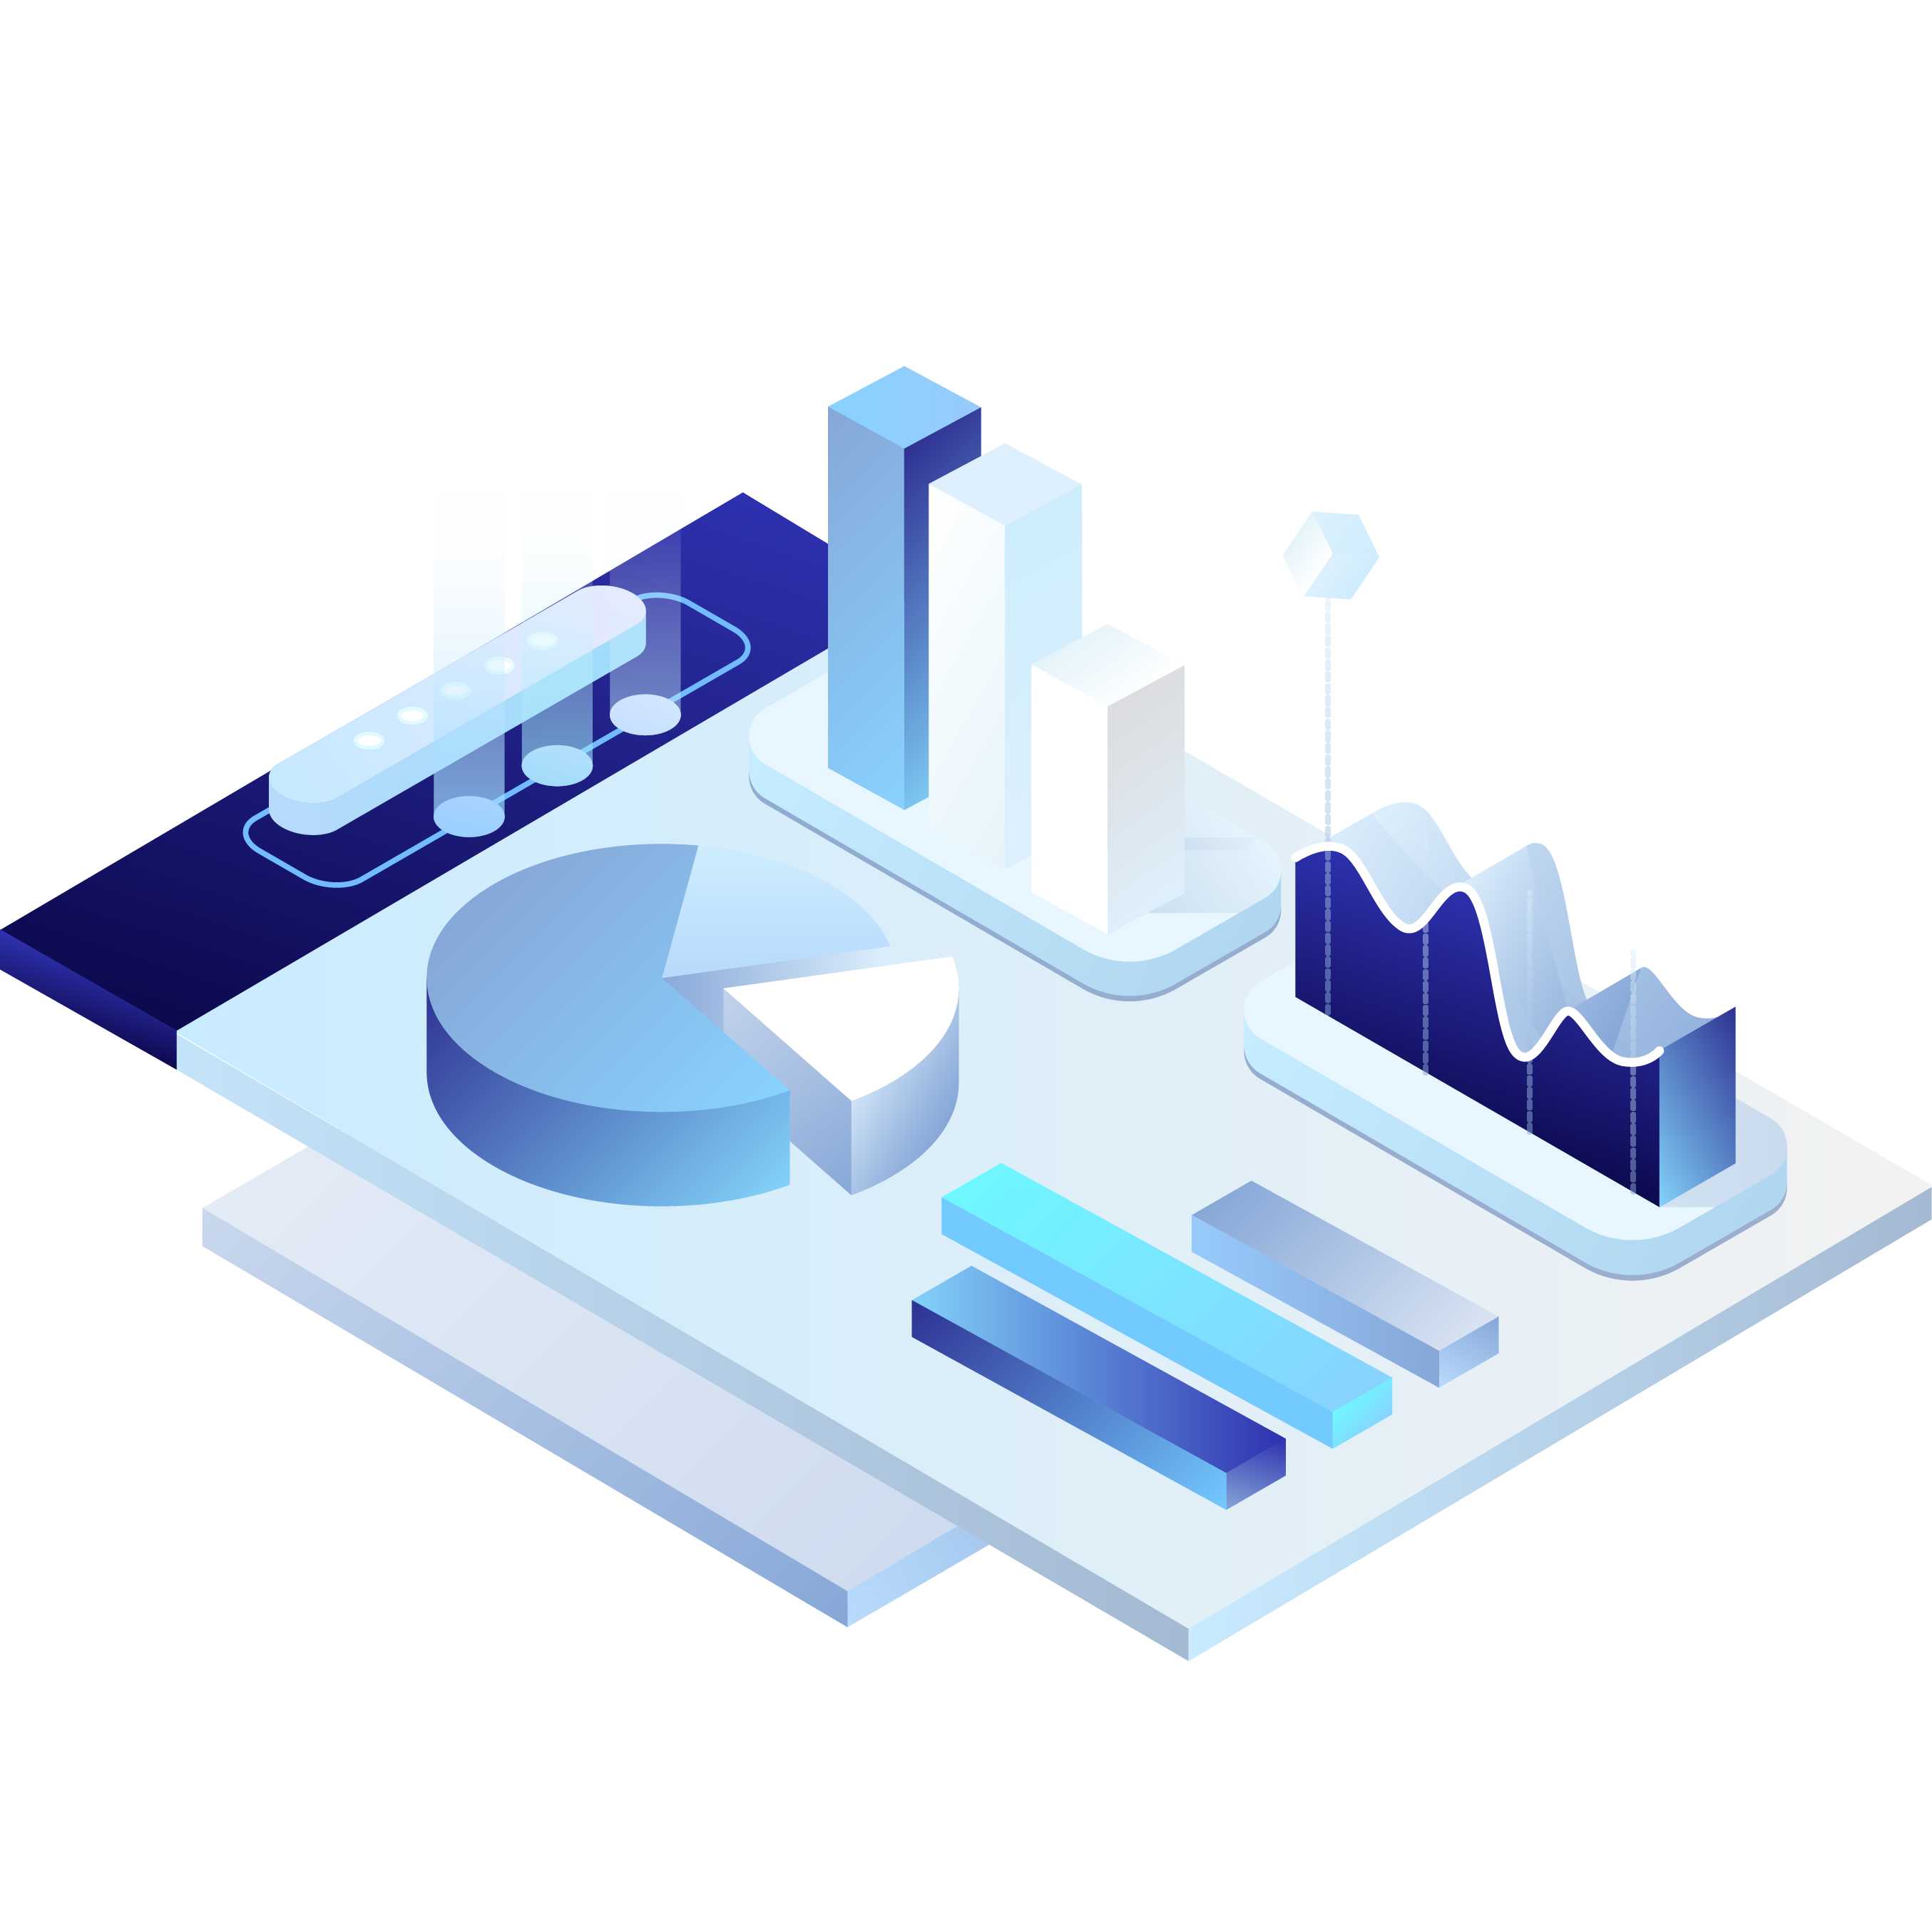

## Import Library

In [1]:
# instalation
# pip install dash

In [2]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px

# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input

In [3]:
# load dataset
data = pd.read_csv('SAAS SALES_cleaned.csv')
data.head()

,Unnamed: 0,Row ID,Order Date,Contact Name,Country,City,Continent,Subregion,Customer,Customer ID,...,Segment,Product,License,Sales,Quantity,Discount,Sub_Discount,Profit,Outlier_Type,Ratio Profit
0,0,1,2022-11-09,Nathan Bell,Ireland,Dublin,Europe,UKIR,Chevron,1017,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.0,Normal Price,41.9136,No Outlier,16.00
1,1,2,2022-11-09,Nathan Bell,Ireland,Dublin,Europe,UKIR,Chevron,1017,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.0,Normal Price,219.5820,Positive Outlier,30.00
2,2,3,2022-06-13,Deirdre Bailey,United States,New York City,America,NAMER,Phillips 66,1056,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.0,Normal Price,6.8714,No Outlier,47.00
3,3,4,2021-10-11,Zoe Hodges,Germany,Stuttgart,Europe,EU-WEST,Royal Dutch Shell,1031,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,45.0,Middle,-383.0310,Negative Outlier,-40.00
4,4,5,2021-10-11,Zoe Hodges,Germany,Stuttgart,Europe,EU-WEST,Royal Dutch Shell,1031,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,20.0,Lower,2.5164,No Outlier,11.25


In [4]:
# Create Dash app
app = dash.Dash('aws_saas_dashboard')

In [5]:
# Define layout
app.layout = html.Div([
    html.H1('AWS SaaS Sales Dashboard'),
    html.Div([
        html.Label('Select Country:'),
        dcc.Dropdown(
            id='Country-dropdown',
            options=[{'label': Country, 'value': Country} 
                     for Country in data['Country'].unique()],
            value=data['Country'].unique()[0]  # Default value
        )
    ]),
    dcc.Graph(id='country-sales-graph'),
    dcc.Graph(id='industry-sales-graph'),
    dcc.Graph(id='product-sales-graph')
])

In [6]:
# Define callbacks
@app.callback(
    Output('country-sales-graph', 'figure'),
    Input('Country-dropdown', 'value')
)
def update_country_graph(selected_country):
    filtered_data = data[data['Country'] == selected_country]
    fig = px.bar(filtered_data, x='Continent', y='Sales', 
                 title=f'Sales by Continent for: {selected_country}',
                color_discrete_sequence=['blue','green','red'],
                hover_data=['Country'])
    return fig

@app.callback(
    Output('industry-sales-graph', 'figure'),
    Input('Country-dropdown', 'value')
)
def update_industry_graph(selected_country):
    filtered_data = data[data['Country'] == selected_country]
    fig = px.bar(filtered_data, x='Industry', y='Sales', 
                 title=f'Sales by Industry for: {selected_country}',
                 color_discrete_sequence=['green','red'])
    return fig

@app.callback(
    Output('product-sales-graph', 'figure'),
    Input('Country-dropdown', 'value')
)
def update_product_graph(selected_country):
    filtered_data = data[data['Country'] == selected_country]
    fig = px.bar(filtered_data, x='Product', y='Sales', 
                 title=f'Sales by Product for: {selected_country}',
                 color_discrete_sequence=['red'])
    return fig

In [7]:
# Run app
if 'aws_saas_dashboard' == 'aws_saas_dashboard':
    app.run_server(debug=True)

## Conclusion

This dashboard application allows users to analyze and visualize AWS SaaS sales data more effectively. By using features such as filters, dropdowns, and graphs, users can easily understand trends and patterns in sales data, and make more informed business decisions.

For Business:
- This application can help AWS SaaS businesses in several ways:

1. Increase Efficiency: Using this application, sales and analytics teams can quickly analyze sales data and make more informed decisions, thereby increasing efficiency in business processes.

2. Optimizing Strategy: This application allows users to analyze sales data based on various dimensions, such as product, industry and region, thereby helping businesses optimize sales and marketing strategies.

3. Increase Revenue: Using this application, businesses can identify untapped sales opportunities and optimize product prices, thereby increasing revenue.

4. Reduce Costs: This application can help businesses reduce costs by identifying ineffective areas and optimizing business processes.